In [17]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

In [18]:
def central_field_approximation(r : float, Z : float) -> float:
	return Z**3 * 4 * r**2 * np.exp(-2 * Z * r)

In [19]:
data = np.genfromtxt("../data/data_n5000_neq0_alpha_0.100.csv", delimiter=",")

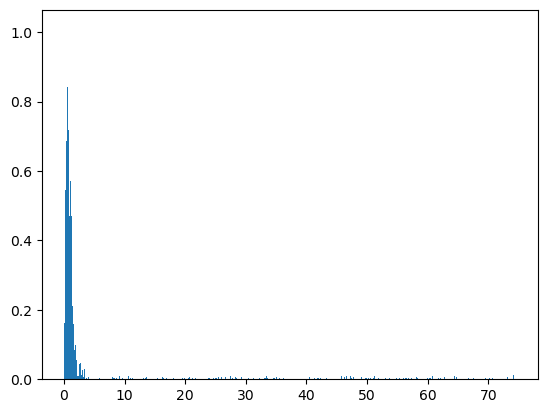

In [20]:
only_positions = data[:,:6]
only_positions = only_positions.reshape(-1,3)
only_lenths = np.linalg.norm(only_positions, axis=1)
plt.hist(only_lenths, bins=1000, density=True);plt.show()
plt.show()

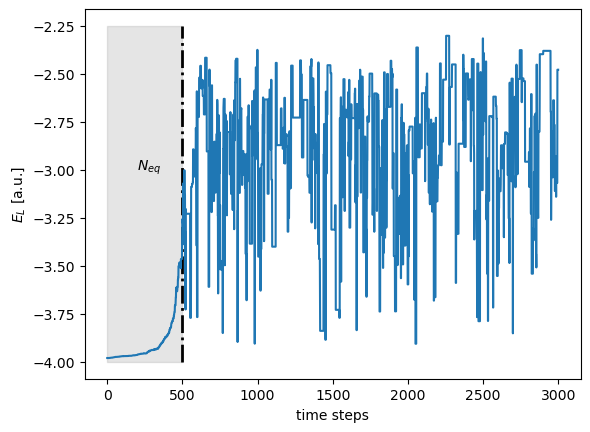

In [21]:
cum_energy = np.cumsum(data[:,-1])
plt.plot([500,500], [-4,-2.25],'-.', color='black', linewidth=2)
plt.text(200,-3,'$N_{eq}$')
plt.fill_betweenx([-4, -2.25], 0, 500, color='gray', alpha=0.2, label="Shaded Region")
plt.plot(data[:3000,-1], label='Energy levels.')
plt.xlabel('time steps')
plt.ylabel('$E_L$ [a.u.]')
plt.show()

In [22]:
autocorr_data = np.genfromtxt("../data/task2b.csv", delimiter=",")
autocorr = autocorr_data[:2000,0]
block_average = autocorr_data[:2000,1]
block_size = autocorr_data[:2000,2]

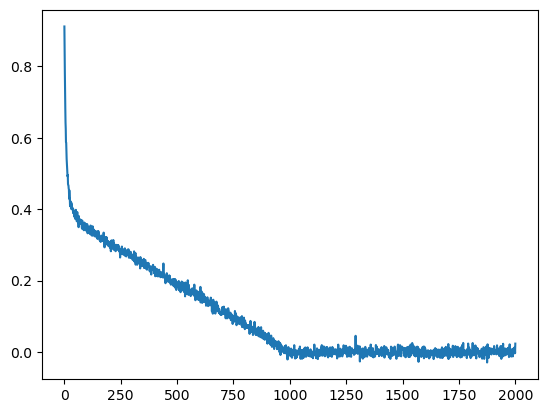

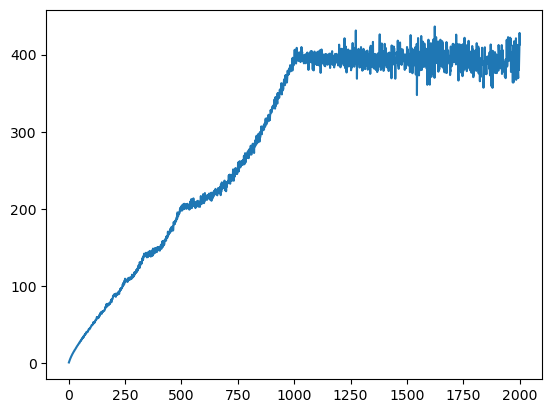

In [23]:
plt.plot(block_size, autocorr)
plt.show()
plt.plot(block_size, block_average)
plt.show()